# Titanic Problem:
We want to discover which passengers survived through the data.

This notebook is divide by:
* Data analysis
* Feature Engineer at:
   * Gender, Embarked type, Name, Age and Fare
* Modeling with:
   * KNeighborsClassifier, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
   * Score and Cross-Validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv("titanic_train.csv")
titanic_test = pd.read_csv("titanic_test.csv")
# Creating a list with two files, more accuracy for to the math to fill NaN values
combined = [titanic, titanic_test]

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Working with Gender

In [5]:
#Checking if exist some NaN value
len(titanic[titanic['Sex'].isnull()])

0

In [6]:
#How many unique enters this array have.
titanic["Sex"].unique()

array(['male', 'female'], dtype=object)

In [7]:
#Checking which gender have more survivers
titanic[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
# Replacing Categorical variables by continuous, with this for and this list(combined),
# we can replace Sex in titanic and test_ticanic

dicsex = {"male": 0, "female": 1}
for dfsex in combined:
    dfsex['Sex'] = dfsex['Sex'].map(dicsex)
    
#other method    
#titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
#titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


# Working with Embarked type

In [10]:
#Checking if exist some NaN value
len(titanic[titanic['Embarked'].isnull()])

2

In [11]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [12]:
# Trying to found an insight, connecting all common variables of these people to predict where they embarked, without success
titanic[(titanic['Pclass'] == 1) & (titanic['Survived'] == 1) & (titanic['Sex'] == 1)].groupby('Embarked').sum()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,,,
C,18038,42,42,42,1320.0,22,13,4943.8208
Q,413,1,1,1,33.0,1,0,90.0000
S,23788,46,46,46,1412.0,27,26,4450.1917


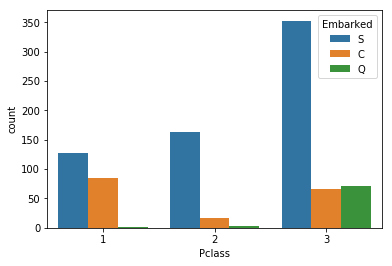

In [13]:
# Here we can see, at all classes most of people embarked on "S", so to fill this data with less variation we put "S".
sns.countplot(x = 'Pclass', data = titanic, hue = 'Embarked')

In [14]:
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [15]:
# Same concept to replace used at Sex column
dic_embarked = {"S": 0, "C": 1, "Q": 2}
for df_embarked in combined:
    df_embarked['Embarked'] = df_embarked['Embarked'].map(dic_embarked)

# Working with Name

#Combining both Dataset, BECAUSE EXIST THE POSSIBILITY THAT IN ONE DF DOESN'T EXIST THE SAME PRONOUNS TREATMENT in the other

In [16]:
# getting all Title from Name column in both DataFrames through the list and creating a new column with those titles
for df in combined:
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)

In [17]:
# concat both updated dataframes to see the distribution of titles at titanic
combined_df = pd.concat([titanic, titanic_test], axis = 0)
combined_df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Don           1
Countess      1
Mme           1
Capt          1
Sir           1
Dona          1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

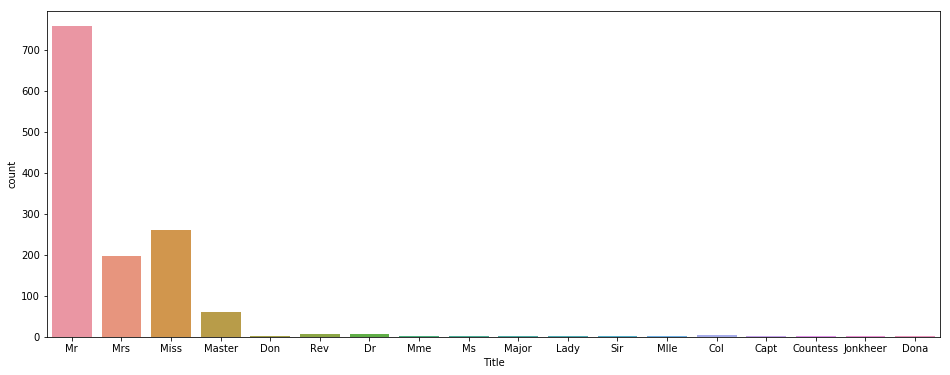

In [18]:
plt.subplots(figsize = (16,6))
sns.countplot(x = 'Title', data = combined_df)

In [19]:
# Same concept to replace used at Sex column, considering the 4 largest groups of people and the rest of them in 1 group
# Mr: 0
# Miss: 1
# Mrs: 2
# Master: 3
# Others: 4
titlemap = {"Mr": 0,
            "Miss": 1, 
            "Mrs": 2, 
            "Master": 3, 
            "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4, "Ms": 4, 
            "Lady": 4, "Jonkheer": 4,"Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }
for df in combined:
    df['Title'] = df['Title'].map(titlemap)

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0


# Working with Age

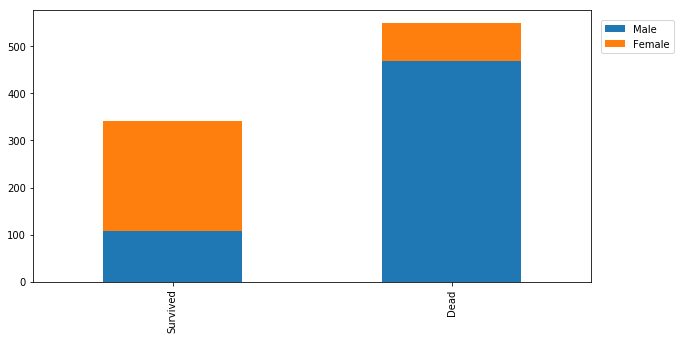

In [21]:
# Lets see how is the distribuition by gender for people who survived and whos dont.
survived = titanic[titanic['Survived']==1]['Sex'].value_counts()
# Extract how many peoples for each sex survived
dead = titanic[titanic['Survived']==0]['Sex'].value_counts()
# Extract how many peoples for each sex not survived
df = pd.DataFrame([survived,dead])
df.columns= ['Male', 'Female']
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1)

In [22]:
#looking for null values ate Age.
len(titanic[titanic['Age'].isnull()])

177

In [23]:
# Here we need to make a decision, which  variable we'll relate with Age to fill the empty values
titanic[titanic['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2,0
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,0,0
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,1,2
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,1,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,2,1


In [24]:
# looking to the first possibility, calculate new ages through Pclass
combined_df[['Age','Pclass']].groupby('Pclass').mean()

,Age
Pclass,
1,39.159930
2,29.506705
3,24.816367


In [25]:
#Here we have more accuracy, title it is very related to age
combined_df = pd.concat([titanic, titanic_test], axis = 0)
combined_df[['Age','Title']].groupby('Title').mean()

,Age
Title,
0,32.252151
1,21.774238
2,36.994118
3,5.482642
4,42.656250


In [26]:
# this is one function to verify all null values at AGE, and substitute to this respective new value considering Title
# using combined_df, we can be more accurate to get the new mean values, because we consider a bigger data
def impute_age(cols):
    Age = cols[0]
    Title = cols[1]
    
    if pd.isnull(Age):
        if Title == 0:
            return combined_df['Age'][combined_df['Title'] == 0].mean()
        elif Title == 1:
            return combined_df['Age'][combined_df['Title'] == 1].mean()
        elif Title == 2:
            return combined_df['Age'][combined_df['Title'] == 2].mean()
        elif Title == 3:
            return combined_df['Age'][combined_df['Title'] == 3].mean()
        else:
            return combined_df['Age'][combined_df['Title'] == 4].mean()
    else:
        return Age

In [27]:
# aplly the function on DF's, titanic and titanic_test
titanic['Age'] = titanic[['Age','Title']].apply(impute_age,axis=1)
titanic_test['Age'] = titanic_test[['Age','Title']].apply(impute_age,axis=1)

In [28]:
# To improve our machine learning model, we need to smooth our data, so we'll divide our Age values in 5 categories
for df_age in combined:
    df_age.loc[ df_age['Age'] <= 16, 'Age'] = 0,
    df_age.loc[(df_age['Age'] > 16) & (df_age['Age'] <= 26), 'Age'] = 1,
    df_age.loc[(df_age['Age'] > 26) & (df_age['Age'] <= 36), 'Age'] = 2,
    df_age.loc[(df_age['Age'] > 36) & (df_age['Age'] <= 62), 'Age'] = 3,
    df_age.loc[ df_age['Age'] > 62, 'Age'] = 4
    #using this for, we can substitute all values at titanic and also titanic_test

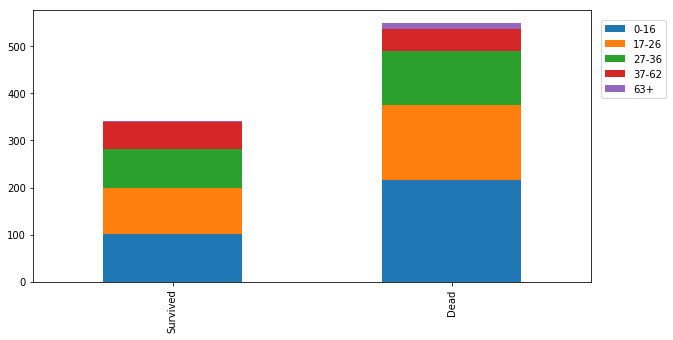

In [29]:
# Lets see how is the distribuition by Age for people who survived and whos dont.
survivedAge = titanic[titanic['Survived']==1]['Age'].value_counts()
# Extract how many peoples for each Age survived
deadAge = titanic[titanic['Survived']==0]['Age'].value_counts()
# Extract how many peoples for each Age not survived
df = pd.DataFrame([survivedAge,deadAge])
df.columns= ['0-16','17-26', '27-36', '37-62', '63+']
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=1)

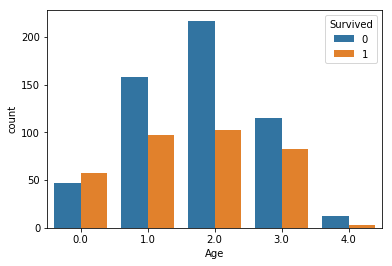

In [30]:
df_age2 = titanic[['Age', 'Survived']]
sns.countplot(x = 'Age', hue = 'Survived', data = df_age2)

In [31]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,12.2875,NaN,0,2


# Working with FARE


In [32]:
#looking for null values ate Fare, Test DF.
titanic_test[titanic_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",0,3.0,0,0,3701,NaN,NaN,0,0


In [33]:
#looking for null values ate Fare, Train DF.
titanic[titanic['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [34]:
# In general, the fare paid is directly relate to the class. the miss value was replaced by the mean value at third class
titanic_test['Fare'] = titanic_test['Fare'].fillna(combined_df['Fare'][combined_df['Pclass'] == 3].mean())

In [35]:
combined_df = pd.concat([titanic, titanic_test], axis = 0)

In [36]:
combined_df['Fare'].describe()
# Isn't good to see the distribution in that way

count    1309.000000
mean       33.280206
std        51.741830
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [37]:
# To improve our machine learning model, we need to smooth our data, so we'll divide our Fare values in 4 categories
for dataset in combined:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [38]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,0.0,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,0.0,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,0.0,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,0.0,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,0.0,NaN,0,2


# Cabin

In [39]:
for dfcabin in combined:
    dfcabin['Cabin'] = dfcabin['Cabin'].str[:1]

In [40]:
# if we try to associate Cabin location to Fare, data are very confused
print(titanic[titanic['Fare'] == 0]['Cabin'].unique())
print(titanic[titanic['Fare'] == 1]['Cabin'].unique())
print(titanic[titanic['Fare'] == 2]['Cabin'].unique())
print(titanic[titanic['Fare'] == 3]['Cabin'].unique())

[nan 'G' 'D' 'F' 'E' 'B' 'A']
[nan 'C' 'F' 'D' 'B' 'A' 'E']
['C' 'E' nan 'A' 'D' 'B' 'F' 'T']
['C' 'B' 'D' nan 'E']


In [41]:
# if we try to associate Cabin location to Pclass, we can see a pattern
print(titanic[titanic['Pclass'] == 1]['Cabin'].unique())
print(titanic[titanic['Pclass'] == 2]['Cabin'].unique())
print(titanic[titanic['Pclass'] == 3]['Cabin'].unique())


['C' 'E' 'A' nan 'B' 'D' 'T']
[nan 'D' 'F' 'E']
[nan 'G' 'F' 'E']


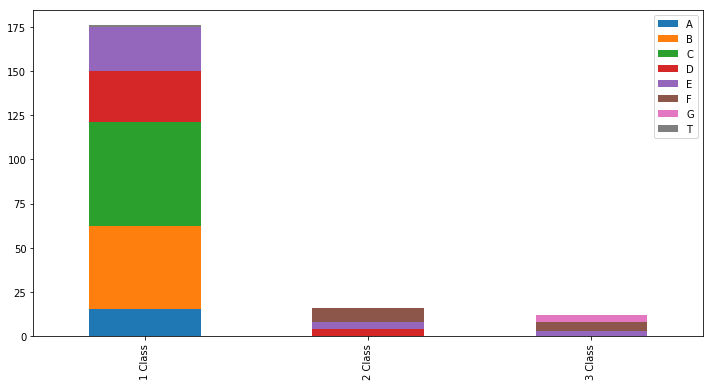

In [42]:
PC1 = titanic[titanic['Pclass'] == 1]['Cabin'].value_counts()
PC2 = titanic[titanic['Pclass'] == 2]['Cabin'].value_counts()
PC3 = titanic[titanic['Pclass'] == 3]['Cabin'].value_counts()
dfCabin = pd.DataFrame([PC1, PC2, PC3])
dfCabin.index = ['1 Class', '2 Class', '3 Class']
dfCabin.plot(kind = 'bar', stacked = True, figsize = (12,6))
plt.style.use('bmh')

In [43]:
# Due Cabin A,B,T,C only exist at First class, they become only A
titanic['Cabin'].replace(['B', 'T', 'C'], ['A', 'A', 'A'], inplace = True);
titanic_test['Cabin'].replace(['B', 'T', 'C'], ['A', 'A', 'A'], inplace = True);

In [44]:
titanic['Cabin'].unique()

array([nan, 'A', 'E', 'G', 'D', 'F'], dtype=object)

In [45]:
dicCabins = {"A": 0, "D": 0.5, "E": 1, "F": 1.5, "G": 2}
for dataset2 in combined:
    dataset2['Cabin'] = dataset2['Cabin'].map(dicCabins)

In [46]:
def impute_cabin(cols):
    Cabin  = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Cabin):
        if Pclass == 1:
            return 0
        elif Pclass == 2:
            return 1
        else:
            return 1.5
    else:
        return Cabin
titanic['Cabin'] = titanic[['Cabin','Pclass']].apply(impute_cabin,axis=1)
titanic_test['Cabin'] = titanic[['Cabin','Pclass']].apply(impute_cabin,axis=1)

# MODELING

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=100, shuffle=True, random_state=0)

from sklearn.model_selection import train_test_split

X_train, X_teste, Y_train, Y_teste = train_test_split(titanic.drop(["Survived",'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
                                                      , titanic["Survived"], test_size = 0.3, random_state = 101)


In [48]:
X_train = titanic.drop(["Survived",'PassengerId', 'Name', 'Ticket'], axis=1)
Y_train = titanic["Survived"]
X_test  = titanic_test.drop(["PassengerId", 'Name', 'Ticket'], axis=1)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
score_knn = cross_val_score(knn, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy')
print('KNN Cross: {}\nKNN:       {}'.format(round(np.mean(score_knn)*100,3), acc_knn))

KNN Cross: 82.167
KNN:       83.05


In [50]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, Y_train)
Y_pred = logistic.predict(X_test)
acc_log = round(logistic.score(X_train, Y_train) * 100, 2)
score_lr = cross_val_score(logistic, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy')
print('Logistic Cross: {}\nLogistic:       {}'.format(round(np.mean(score_lr)*100,2), acc_log))

Logistic Cross: 81.17
Logistic:       81.71


In [51]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
score_dt = cross_val_score(decision_tree, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy')
print('Decision Tree Cross: {}\nDecision Tree:       {}'.format(round(np.mean(score_dt)*100,2), acc_decision_tree))

Decision Tree Cross: 79.72
Decision Tree:       89.79


In [52]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
score_rf = cross_val_score(random_forest, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy')
print('Random Forest Cross: {}\nRandom Forest:       {}'.format(round(np.mean(score_rf)*100,2), acc_random_forest))

Random Forest Cross: 80.93
Random Forest:       89.79


In [53]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, Y_train)
Y_pred = gbk.predict(X_test)
acc_gbk = round(gbk.score(X_train, Y_train) * 100, 2)
score_gbk = cross_val_score(gbk, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy')
print('Gradient Boosting Classifier Cross: {}\nGradient Boosting Classifier:       {}'.format(round(np.mean(score_gbk)*100,2), acc_gbk))

Gradient Boosting Classifier Cross: 82.46
Gradient Boosting Classifier:       86.31


In [54]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
score_svc = cross_val_score(svc, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy')
print('SVC Cross: {}\nSVC:       {}'.format(round(np.mean(score_svc)*100,2), acc_svc))

SVC Cross: 82.39
SVC:       84.06


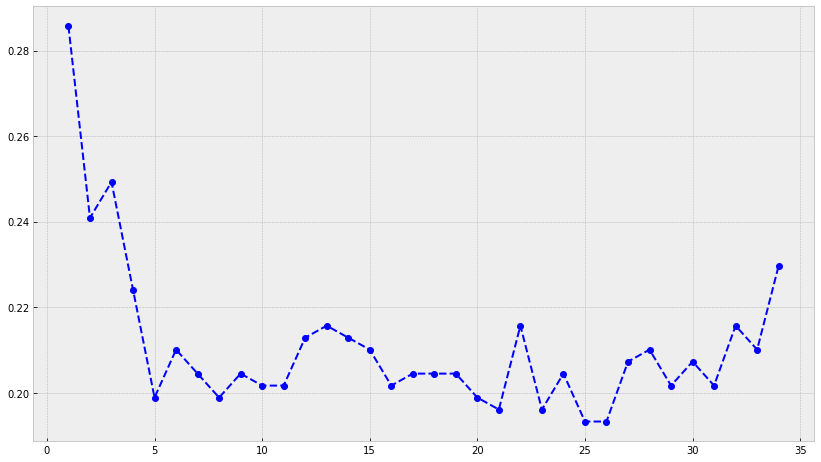

In [55]:
from sklearn.model_selection import train_test_split
x_trainG, x_testeG, y_trainG, y_testeG = train_test_split(titanic.drop(["Survived",'PassengerId',
                                                                    'Name', 'Ticket', 'Cabin'],
                                                                     axis=1), titanic["Survived"], 
                                                                     test_size = 0.4, random_state = 101)
error_rate = []
for i in range(1,35):
    knnG = KNeighborsClassifier(n_neighbors = i)
    knnG.fit(x_trainG, y_trainG)
    y_predG = knnG.predict(x_testeG)
    error_rate.append(np.mean(y_predG!=y_testeG))
plt.figure(figsize = (14, 8))
plt.plot(range(1, 35), error_rate, color = 'blue', ls = 'dashed', marker = 'o')


In [56]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree',
              'Random Forest', 'KNN', 'Gradient Boosting Classifier', 'SVC'],
    'Score': [np.mean(score_lr)*100, np.mean(score_dt)*100, np.mean(score_rf)*100,
             np.mean(score_knn)*100, np.mean(score_gbk)*100, np.mean(score_svc)*100]})
print('Cross Validation')
models.sort_values(by='Score', ascending=False)

Cross Validation


,Model,Score
4,Gradient Boosting Classifier,82.458333
5,SVC,82.388889
3,KNN,82.166667
0,Logistic Regression,81.166667
2,Random Forest,80.930556
1,Decision Tree,79.722222


In [57]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree',
              'Random Forest', 'KNN', 'Gradient Boosting Classifier', 'SVC'],
    'Score': [acc_log, acc_decision_tree, acc_random_forest,
             acc_knn, acc_gbk, acc_svc]})
print('Score')
models.sort_values(by='Score', ascending=False)

Score


,Model,Score
1,Decision Tree,89.79
2,Random Forest,89.79
4,Gradient Boosting Classifier,86.31
5,SVC,84.06
3,KNN,83.05
0,Logistic Regression,81.71


In [58]:
# Run the Model First
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)